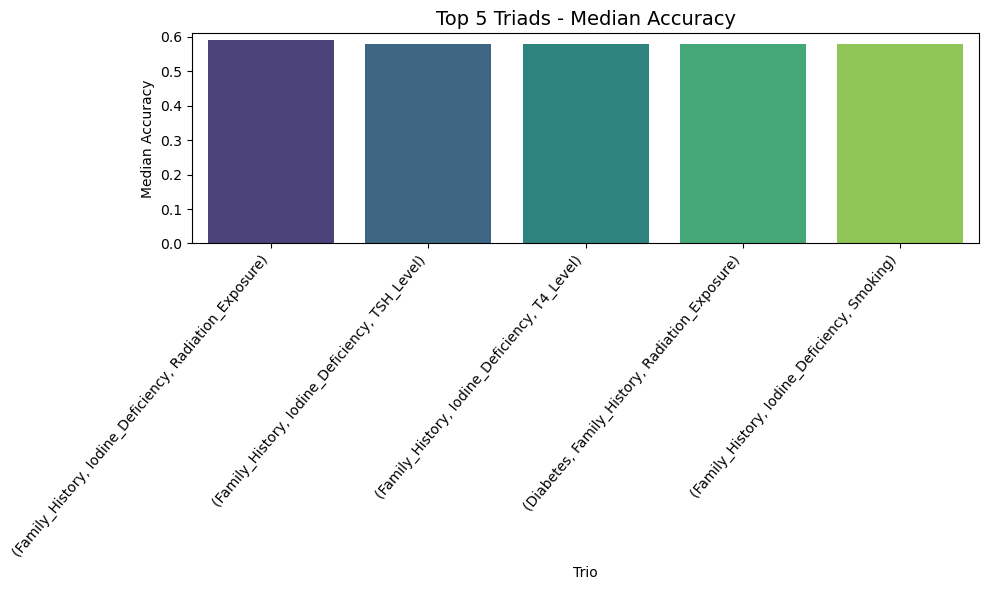

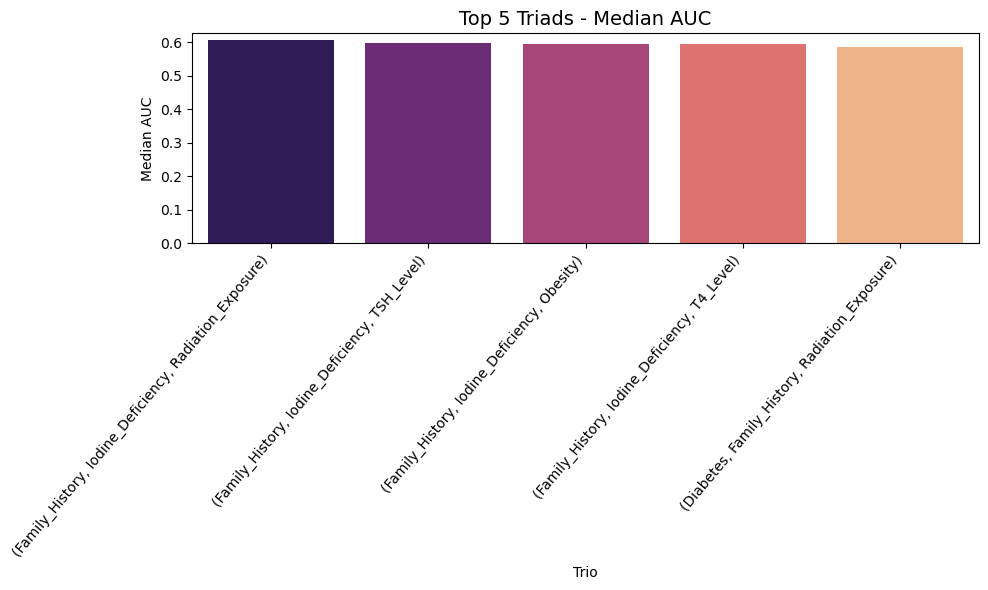

In [1]:
import pandas as pd #Εισαγωγή Pandas ως κύρια βιβλιοθήκη για διαχείριση/ανάλυση πινάκων δεδομένων (DataFrames)
import matplotlib.pyplot as plt #Εισαγωγή γενικής βιβλιοθήκης γραφημάτων (figures, άξονες, αποθήκευση).
import seaborn as sns #Εισαγωγή Seaborn για την εξαγωγή Boxplots.
import warnings
warnings.filterwarnings('ignore') #Επειδή ο κώδικας μπορεί να τρέχει σε διαφορετικά api (application programming interfaces)
#γίνεται εισαγωγή του συγκεκριμένου module warnings με σκοπό να μην εμφανίζονται σχετικές προειδοποιήσεις. 



# Εισαγωγή Δεδομένων
data = { #Ορισμός πίνακα (λεξικού) με τις τριάδες και μετρικές που ανέδειξε ο Logistic Regression. 
    "Trio": [
        "(Family_History, Iodine_Deficiency, Radiation_Exposure)",
        "(Family_History, Iodine_Deficiency, TSH_Level)",
        "(Family_History, Iodine_Deficiency, T4_Level)",
        "(Diabetes, Family_History, Radiation_Exposure)",
        "(Family_History, Iodine_Deficiency, Smoking)",
        "(Family_History, Iodine_Deficiency, Nodule_Size)",
        "(Family_History, Radiation_Exposure, Smoking)",
        "(Family_History, Nodule_Size, Radiation_Exposure)",
        "(Diabetes, Family_History, Iodine_Deficiency)",
        "(Family_History, Iodine_Deficiency, Obesity)"
    ],
    "Median_Accuracy": [0.590, 0.580, 0.580, 0.580, 0.580, 0.580, 0.580, 0.580, 0.575, 0.570], #Εισαγωγή τιμών  Accuracy
    "Median_AUC": [0.606571, 0.597756, 0.594151, 0.586939, 0.584535, 0.583734, 0.580929, 0.568910, 0.579327, 0.595353] #Εισαγωγή τιμών AUC
}
 
df = pd.DataFrame(data) #Μετατροπή σε dataframe για ευκολη ταξινόμηση/σχεδίαση. 
 
# ----- Top 5 Accuracy -----
top5_acc = df.sort_values(by="Median_Accuracy", ascending=False).head(5)  # Επιλογή των πέντε τριάδων με την υψηλότερη Median_Accuracy
plt.figure(figsize=(10, 6)) # Ορισμός μεγέθους καμβά - πιο πλατύ γράφημα
sns.barplot(data=top5_acc, x="Trio", y="Median_Accuracy",
            palette="viridis", #Χρήση της έτοιμης παλέτας "viridis" της Seaborn η οποία εχει συνεχή διαβάθμιση απο σκούρο μπλέ σε πρασινο και κίτρινο
            order=top5_acc["Trio"], width=0.8)  # Καθορισμός πάχους μπάρας

# Τίθεταιτο άνω όριο του άξονα y, προσθέτοντας ένα μικρό περιθώριο ώστε οι μπάρες να μην ακουμπούν στο ανώτατο όριο.
plt.ylim(0, top5_acc["Median_Accuracy"].max() + 0.02) 
# Ορισμός τίτλου γραφήματος με μέγεθος γραμματοσειράς 14 για καλύτερη αναγνωσιμότητα.
plt.title("Top 5 Triads - Median Accuracy", fontsize=14)

plt.ylabel("Median Accuracy")   # Ορισμός της ετικέτας του κατακόρυφου άξονα (y-axis).
plt.xlabel("Trio") # Ορισμός της ετικέτας του οριζόντιου άξονα (x-axis).
plt.xticks(rotation=50, ha='right') # Περιστροφή των ετικετών του x-axis κατά 50 μοίρες στοιχίζοντας τες δεξιά.
plt.tight_layout() #Αυτόματη προσαρμογή περιθωρίων ώστε να μην επικαλύπτονται τίτλοι, άξονες ή ετικέτες.
plt.show() # Εμφάνιση του γραφήματος στην οθόνη.

print("\n\n")
 
# ----- Top 5 AUC -----
top5_auc = df.sort_values(by="Median_AUC", ascending=False).head(5) # Επιλογή των πέντε τριάδων με την υψηλότερη Median AUC.
plt.figure(figsize=(10, 6)) #Δημιουργία νέου καμβά  ίδιων διαστάσεων.
sns.barplot(data=top5_auc, x="Trio", y="Median_AUC",  # Σχεδιασμός barplot για τις κορυφαίες τριάδες με βάση την AUC,
            palette="magma",                   #Χρήση της έτοιμης παλέτας "magma" της Seaborn η οποία εχει συνεχή διαβάθμιση απο σκούρο μοβ σε πορτοκαλι
            order=top5_auc["Trio"], width=0.8) # Καθορισμός πάχους μπάρας

# Τίθεται το άνω όριο του άξονα y, προσθέτοντας ένα μικρό περιθώριο ώστε οι μπάρες να μην ακουμπούν στο ανώτατο όριο.
plt.ylim(0, top5_auc["Median_AUC"].max() + 0.02) 
#Ορισμός τίτλου γραφήματος με μέγεθος γραμματοσειράς 14 για καλύτερη αναγνωσιμότητα.
plt.title("Top 5 Triads - Median AUC", fontsize=14) 

plt.ylabel("Median AUC")  # Ορισμός της ετικέτας του κατακόρυφου άξονα (y-axis).
plt.xlabel("Trio") # Ορισμός της ετικέτας του οριζόντιου άξονα (x-axis).
plt.xticks(rotation=50, ha='right') # Περιστροφή των ετικετών του x-axis κατά 50 μοίρες στοιχίζοντας τες δεξιά.
plt.tight_layout() #Αυτόματη προσαρμογή περιθωρίων ώστε να μην επικαλύπτονται τίτλοι, άξονες ή ετικέτες.
plt.show() # Εμφάνιση του γραφήματος στην οθόνη.
 

## Συμπεράσματα από τα Barplots
 
Η ανάλυση των 5 κορυφαίων τριάδων δεικτών με βάση το **Median Accuracy** και το **Median AUC** δείχνει ότι:
 
- **Κοινό μοτίβο**: Σχεδόν όλες οι κορυφαίες τριάδες περιλαμβάνουν τον δείκτη **Family_History** σε συνδυασμό με **Iodine_Deficiency**, γεγονός που υποδηλώνει ότι αυτοί οι δύο παράγοντες έχουν σταθερή και ισχυρή προγνωστική συμβολή.
- **Καλύτερη τριάδα σε Median Accuracy**: *(Family_History, Iodine_Deficiency, Radiation_Exposure)* με **Median Accuracy = 0.590** και **Median AUC ≈ 0.607**.
- **Καλύτερη τριάδα σε Median AUC**: Επίσης *(Family_History, Iodine_Deficiency, Radiation_Exposure)*, γεγονός που δείχνει συνοχή στην κατάταξη ανάμεσα στους δύο δείκτες αξιολόγησης.
- **Σταθερές επιδόσεις**: Οι τιμές Median Accuracy για τις κορυφαίες 5 τριάδες κυμαίνονται μεταξύ 0.580 και 0.590, ενώ οι Median AUC κυμαίνονται περίπου από 0.584 έως 0.607.
- **Ερμηνεία**: Οι παράγοντες που συνδυάζουν οικογενειακό ιστορικό, έλλειψη ιωδίου και περιβαλλοντική έκθεση (όπως ακτινοβολία) εμφανίζονται να παίζουν κεντρικό ρόλο στην πρόβλεψη της εξέλιξης του καρκίνου του θυρεοειδούς.
 
 **Επόμενα βήματα**:
- Να συγκριθούν τα αποτελέσματα Logistic Regression και Random Forest για τις ίδιες τριάδες.
- Να διερευνηθεί η συμπληρωματική πληροφορία μέσω ανάλυσης συσχετίσεων (Correlation Analysis) και άλλων μοντέλων.